In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# upload csv Data.  All data from Kaggle.com(https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv)
# https://www.kaggle.com/datasets/bahadirumutiscimen/cancer-death-rates-in-the-world-19902019

cancer_path = "Resources/total-cancer-deaths-by-type.csv"
econ_path = "Resources/WorldSustainabilityDataset.csv"

# Upload Raw Kaggle Data
cancer_df = pd.read_csv(cancer_path)
econ_df = pd.read_csv(econ_path)

In [3]:
cancer_df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)  \
0                                                851            
1                                                866            
2                                                890            
3                                                914            
4                                                933            

   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 66             
1                                                 66             
2                                                 68             
3                                                 70             
4                                                 71             

   Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 89                          
1                                                 89                          
2                                                 91                          
3                                                 93                          
4                                                 94                          

   Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)  \
0                                                983                                   
1                                                982                                   
2                                                989                                   
3                                                995                                   
4                                                996                                   

   Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)  \
0                                                260             
1                                                263             
2                                                268             
3                                                275             
4                                                282             

   Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)  \
0                                                180                                    
1                                                182                                    
2                                                185                                    
3                                                189                                    
4                                                193                                    

   Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)  ...  \
0                                                 47                      ...   
1                                                 48                      ...   
2                                                 51                      ...   
3                                                 53                      ...   
4                                                 54                      ...   

   Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number)  \
0                                                422                                       
1                                                438                                       
2                                                472                                       
3                                                505                                       
4                                                526                                       

   Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)

In [4]:
econ_df.head()

Country Name Country Code  Year  \
0        Aruba          ABW  2000   
1        Aruba          ABW  2001   
2        Aruba          ABW  2002   
3        Aruba          ABW  2003   
4        Aruba          ABW  2004   

   Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
0                                          91.660398          
1                                         100.000000          
2                                         100.000000          
3                                         100.000000          
4                                         100.000000          

   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG  \
0                                                NaN                                  
1                                                NaN                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                NaN                                  

   Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS  \
0                                          15.392211                                            
1                                          11.491930                                            
2                                           3.893620                                            
3                                           6.713863                                            
4                                           9.801576                                            

   Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS  \
0                                           2.389134                        
1                                           2.509046                        
2                                           2.721385                        
3                                           2.733676                        
4                                           2.678363                        

   Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS  \
0                                           0.000190                              
1                                           0.000214                              
2                                           0.000223                              
3                                           0.000243                              
4                                           0.000256                              

   Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS  \
0                                           0.000190                       
1                                           0.000214                       
2                                           0.000223                       
3                                           0.000243                       
4                                           0.000256                       

   Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

   ...  Gini index (World Bank estimate) - SI.POV.GINI  \
0  ...                                             NaN   
1  ...                                             NaN   
2  ...                                             NaN   
3  ...                                             NaN   
4  ...                                             NaN   

   Income Classification (W

In [5]:
#  Create list of countries from each dataset

cancer_list= cancer_df["Entity"].unique()
econ_list = econ_df["Country Name"].unique()

In [6]:
# Count identical countries in each dataset
country_count = []

for x in cancer_list:
    if x in econ_list:
        country_count.append(x)
        
print(len(country_count))

149


In [7]:
# Print list of matching countries
country_count

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Les

In [8]:
# Merge Dataframes on country and year "inner" into new cancer_merge_df

cancer_merge_df = pd.merge(cancer_df, econ_df, how="inner", left_on=["Entity","Year"], right_on=["Country Name","Year"], copy=False)

In [9]:
# Review new data frame
cancer_merge_df.head()

Entity Code  Year  \
0  Albania  ALB  2000   
1  Albania  ALB  2001   
2  Albania  ALB  2002   
3  Albania  ALB  2003   
4  Albania  ALB  2004   

   Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)  \
0                                                316            
1                                                301            
2                                                295            
3                                                290            
4                                                272            

   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 40             
1                                                 42             
2                                                 47             
3                                                 53             
4                                                 57             

   Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 31                          
1                                                 31                          
2                                                 34                          
3                                                 37                          
4                                                 39                          

   Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)  \
0                                                748                                   
1                                                734                                   
2                                                765                                   
3                                                806                                   
4                                                817                                   

   Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 70             
1                                                 68             
2                                                 72             
3                                                 77             
4                                                 77             

   Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 26                                    
1                                                 26                                    
2                                                 28                                    
3                                                 30                                    
4                                                 31                                    

   Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)  ...  \
0                                                 23                      ...   
1                                                 21                      ...   
2                                                 21                      ...   
3                                                 21                      ...   
4                                                 21                      ...   

   Gini index (World Bank estimate) - SI.POV.GINI  \
0                                             NaN   
1                                             NaN   
2                                            31.7   
3                                             NaN   
4                                             NaN   

   Income Classification (World Bank Definition)  \
0                            Lower-middle income   
1                            Lower-middle income   
2                            Lower-middle income   
3                            Lower-middle income   
4                            Lower-middle income   

   Individ

In [10]:
# View column names
cancer_merge_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All A

In [11]:
# Creat keep list of columns from group for first review

keep = ['Entity','Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number)',
       'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
       'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS',
       'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
       'GDP (current US$) - NY.GDP.MKTP.CD','Continent',
       'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
       'Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Life expectancy at birth, total (years) - SP.DYN.LE00.IN',
       'Population, total - SP.POP.TOTL',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS',
       'Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS',
       'Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
       'World Regions (UN SDG Definition)']

In [12]:
# Create new df to hold kept columns
cancer_clean_df = cancer_merge_df[keep]

cancer_clean_df.head()

Entity  Year  Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)  \
0  Albania  2000                                                316            
1  Albania  2001                                                301            
2  Albania  2002                                                295            
3  Albania  2003                                                290            
4  Albania  2004                                                272            

   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)  \
0                                                 40             
1                                                 42             
2                                                 47             
3                                                 53             
4                                                 57             

   Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)  \
0                                                748                                   
1                                                734                                   
2                                                765                                   
3                                                806                                   
4                                                817                                   

   Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)  \
0                                                 23                       
1                                                 21                       
2                                                 21                       
3                                                 21                       
4                                                 21                       

   Deaths - Leukemia - Sex: Both - Age: All Ages (Number)  \
0                                                125        
1                                                121        
2                                                124        
3                                                129        
4                                                132        

   Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)  \
0                                                162             
1                                                163             
2                                                175             
3                                                191             
4                                                198             

   Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)  \
0                                                192               
1                                                195               
2                                                206               
3                                                219               
4                                                227               

   Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)  ...  \
0                                                 14             ...   
1                                                 14             ...   
2                                                 14             ...   
3                                                 15             ...   
4                                                 15             ...   

   Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1  \
0                                                NaN          
1                                                4.9          
2                                                6.1          
3                                                7.5          
4                                                8.6          

   Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1  \
0                                                NaN             

In [13]:
# CReate list of for new df columns

kept_list = cancer_clean_df.columns


In [14]:
# Check null values and print column and % of null values remaining in dataset

for name in kept_list:
    null = cancer_clean_df[name].isnull().sum(axis=0)
    perc_null = (null/2831)*100
    print(f'{name} has {perc_null} nulls')

Entity has 0.0 nulls
Year has 0.0 nulls
Deaths - Liver cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Leukemia - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Breast cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Non-Hodgkin lymphoma - Sex: B

In [15]:
# Make a new dataframe comparing countries to high null % columns

check_nulls = cancer_clean_df[['Entity','Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']]

check_nulls.head()

Entity  Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1  \
0  Albania                                                NaN          
1  Albania                                                4.9          
2  Albania                                                6.1          
3  Albania                                                7.5          
4  Albania                                                8.6          

   Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1  
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          
3                                                NaN                                          
4                                                NaN

In [16]:
# Check water column for null data totals 41% of data is Null

country = check_nulls.groupby(check_nulls['Entity']).sum()
country.reset_index(inplace=True)
x = country['Entity'].tolist()
y = country['Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


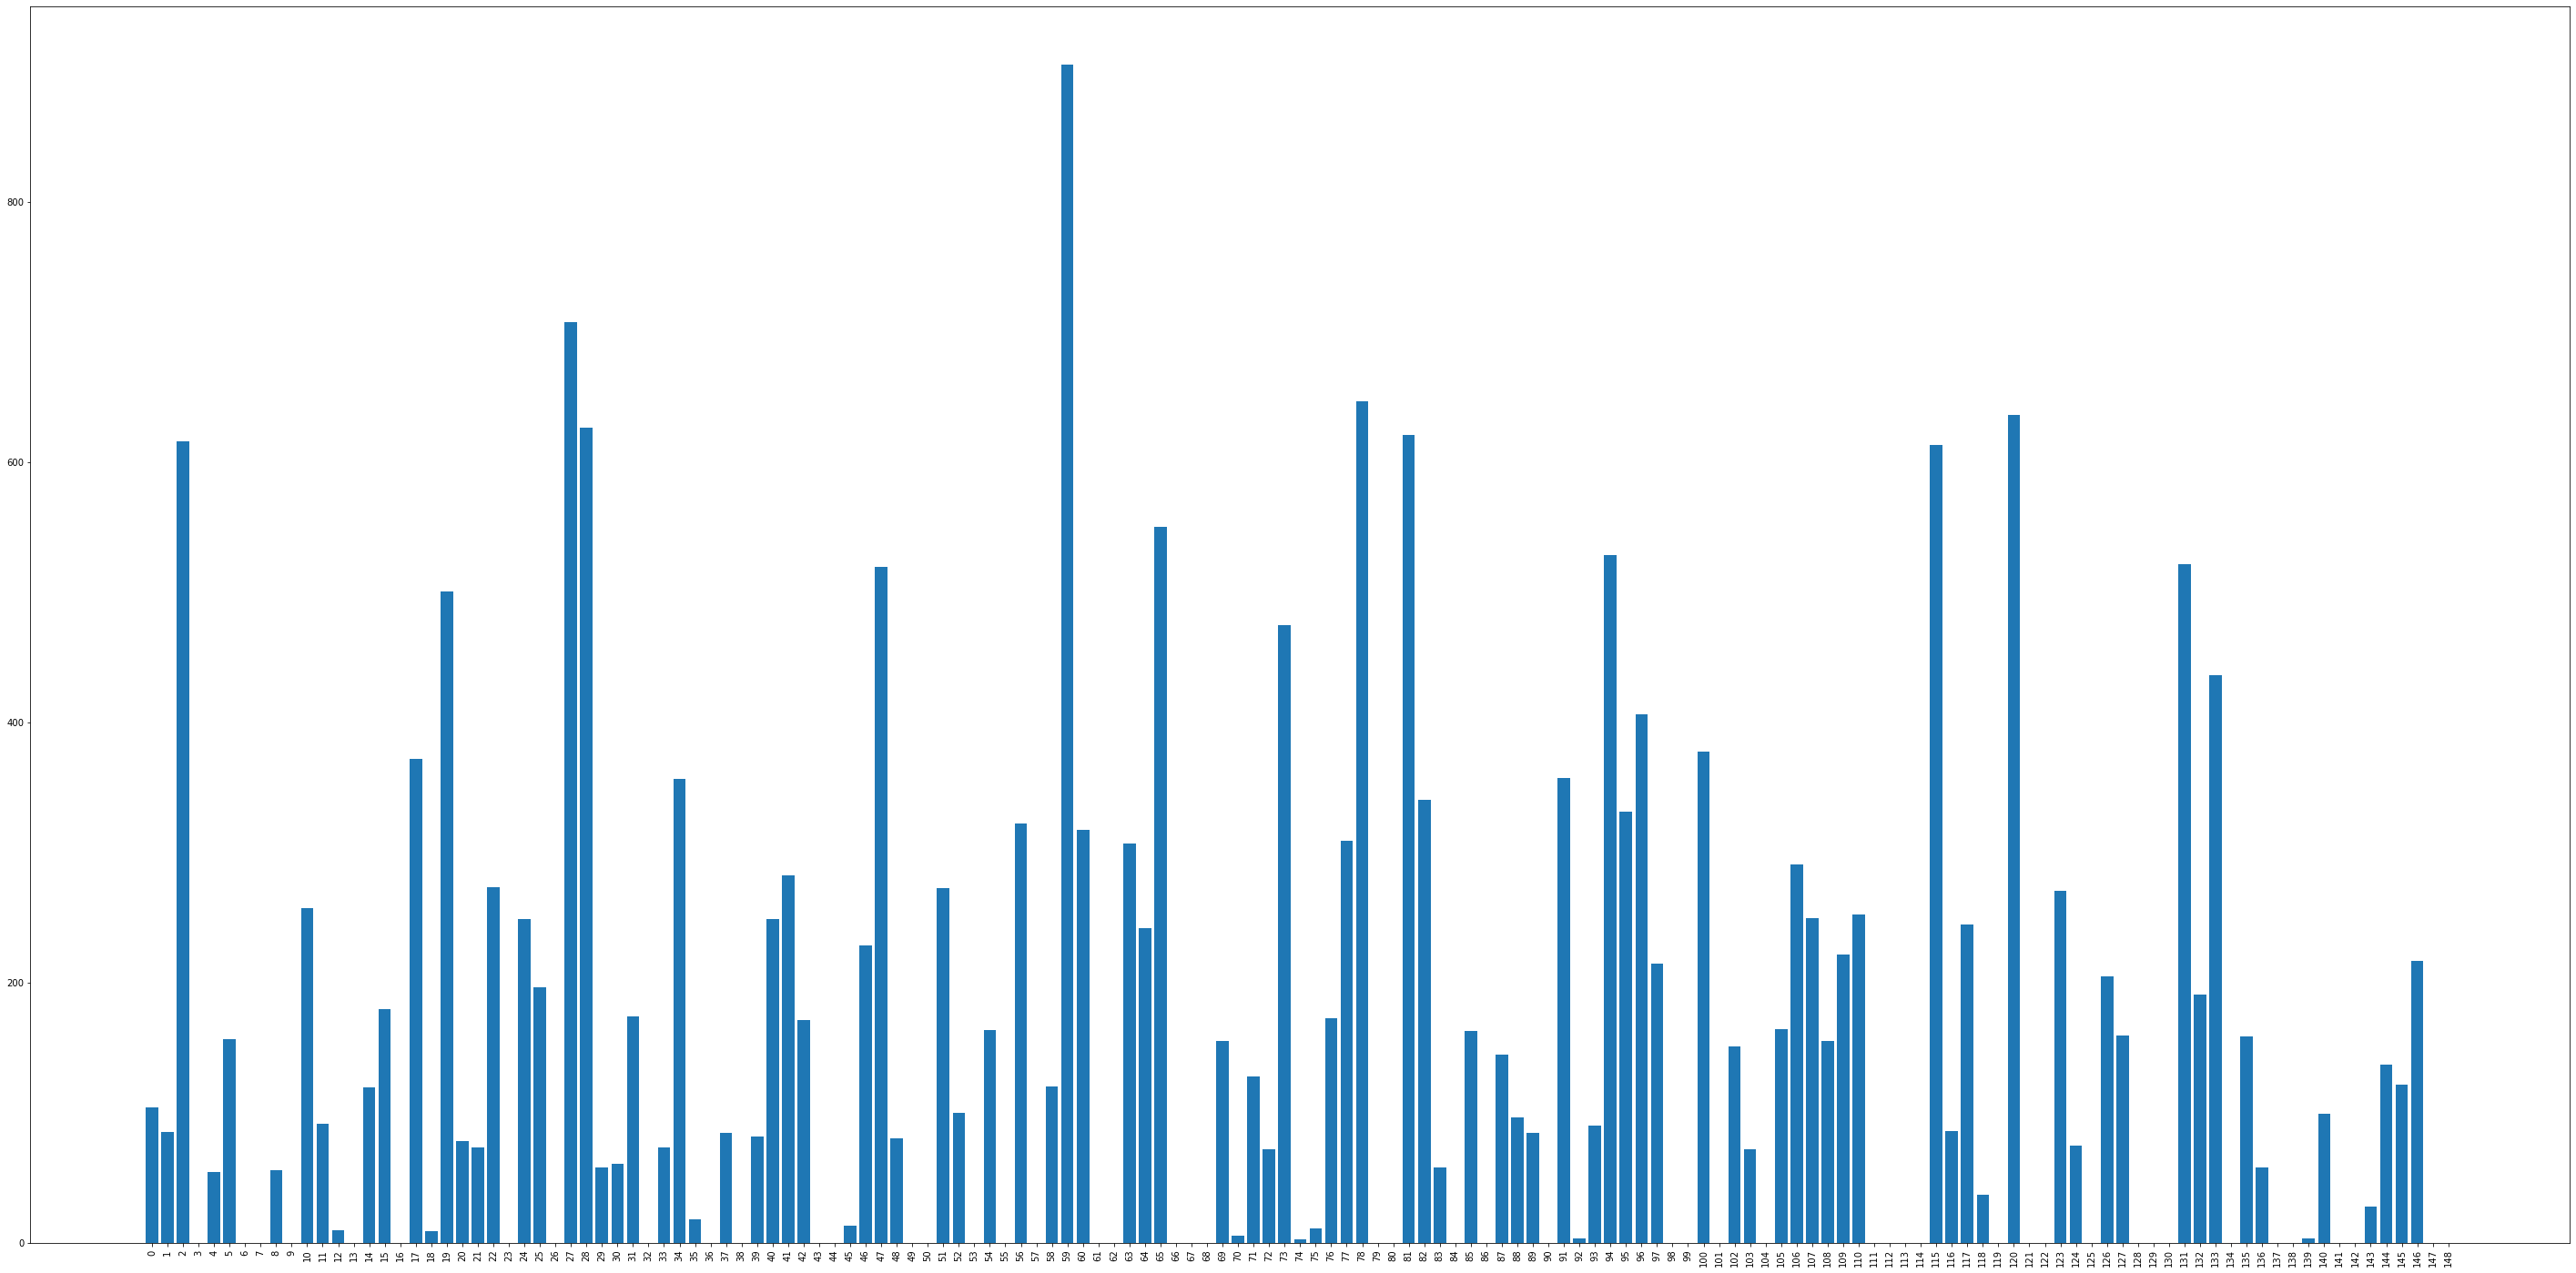

In [17]:
# Check undernourishment column for data amounts  44%  of data is Null

x = country['Entity'].tolist()
y = country['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

In [18]:
# Delete Columns with insufficient Data

eco_cancer_data = cancer_clean_df.drop(columns=['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
                                  'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
                                  'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1'], axis=1)
# Create list of final columns
final_column = eco_cancer_data.columns

final_column.shape

(31,)

In [19]:
# Rename columns to more manageable lengths

# Create list of new column names

rename = ['Country', 'Year',
       'Liver cancer',
       'Kidney cancer',
       'Tracheal, bronchus, and lung cancer',
       'Malignant skin melanoma',
       'Leukemia',
       'Breast cancer',
       'Prostate cancer',
       'Thyroid cancer',
       'Bladder cancer',
       'Uterine cancer',
       'Ovarian cancer',
       'Cervical cancer',
       'Non-Hodgkin lymphoma',
       'Pancreatic cancer',
       'Colon and rectum cancer',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Adjusted savings: particulate emission damage (% of GNI)',
       'GDP (current US$)', 'Continent',
       'Renewable energy consumption',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Life expectancy at birth, total (years)',
       'Population',
       'Rural population (% of total population)',
       'Total natural resources rents (% of GDP)',
       'Urban population (% of total population)',
       'World Regions']

# Create dictionary of new and old column names
dictionary = dict(zip(final_column, rename))

# Rename columns
eco_cancer_data.rename(columns=dictionary, inplace=True)

# Check Column Names
eco_cancer_data.head()

Country  Year  Liver cancer  Kidney cancer  \
0  Albania  2000           316             40   
1  Albania  2001           301             42   
2  Albania  2002           295             47   
3  Albania  2003           290             53   
4  Albania  2004           272             57   

   Tracheal, bronchus, and lung cancer  Malignant skin melanoma  Leukemia  \
0                                  748                       23       125   
1                                  734                       21       121   
2                                  765                       21       124   
3                                  806                       21       129   
4                                  817                       21       132   

   Breast cancer  Prostate cancer  Thyroid cancer  ...  GDP (current US$)  \
0            162              192              14  ...       3.480355e+09   
1            163              195              14  ...       3.922099e+09   
2            175              206              14  ...       4.348070e+09   
3            191              219              15  ...       5.611492e+09   
4            198              227              15  ...       7.184681e+09   

   Continent  Renewable energy consumption  \
0     Europe                     41.445000   
1     Europe                     39.125301   
2     Europe                     35.895802   
3     Europe                     33.751701   
4     Europe                     35.934700   

   Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes  \
0                                              3.004                                       
1                                              3.221                                       
2                                              3.748                                       
3                                              4.232                                       
4                                              4.104                                       

   Life expectancy at birth, total (years)  Population  \
0                                      NaN         NaN   
1                                   74.288   3060173.0   
2                                   74.579   3051010.0   
3                                   74.828   3039616.0   
4                                   75.039   3026939.0   

   Rural population (% of total population)  \
0                                    58.259   
1                                    57.565   
2                                    56.499   
3                                    55.427   
4                                    54.349   

   Total natural resources rents (% of GDP)  \
0                                       NaN   
1                                  0.755950   
2                                  0.760798   
3                                  0.733194   
4                                  0.770849   

   Urban population (% of total population)                World Regions  
0                                       NaN  Europe and Northern America  
1                                    42.435  Europe and Northern America  
2                                    43.501  Europe and Northern America  
3                                    44.573  Europe and Northern America  
4                                    45.651  Europe and Northern America  

[5 rows x 31 columns]

In [20]:
# Clean data for mock up ml unsupervised pca
eco_cancer_data_ml = eco_cancer_data.dropna()

eco_cancer_data_ml.shape

(2552, 31)

In [21]:
# Keep Country Names
country_name_df = eco_cancer_data_ml[['Country',"Year"]]

eco_cancer_data_ml.drop(columns = ['Country',"Continent","Year"], axis=1, inplace=True)
eco_cancer_data_ml.head()

C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Liver cancer  Kidney cancer  Tracheal, bronchus, and lung cancer  \
1           301             42                                  734   
2           295             47                                  765   
3           290             53                                  806   
4           272             57                                  817   
5           246             60                                  804   

   Malignant skin melanoma  Leukemia  Breast cancer  Prostate cancer  \
1                       21       121            163              195   
2                       21       124            175              206   
3                       21       129            191              219   
4                       21       132            198              227   
5                       20       131            208              230   

   Thyroid cancer  Bladder cancer  Uterine cancer  ...  \
1              14              26              28  ...   
2              14              28              30  ...   
3              15              30              32  ...   
4              15              31              33  ...   
5              15              31              35  ...   

   Adjusted savings: particulate emission damage (% of GNI)  \
1                                           0.381428          
2                                           0.366751          
3                                           0.354888          
4                                           0.333259          
5                                           0.308829          

   GDP (current US$)  Renewable energy consumption  \
1       3.922099e+09                     39.125301   
2       4.348070e+09                     35.895802   
3       5.611492e+09                     33.751701   
4       7.184681e+09                     35.934700   
5       8.052076e+09                     36.868301   

   Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes  \
1                                              3.221                                       
2                                              3.748                                       
3                                              4.232                                       
4                                              4.104                                       
5                                              4.199                                       

   Life expectancy at birth, total (years)  Population  \
1                                   74.288   3060173.0   
2                                   74.579   3051010.0   
3                                   74.828   3039616.0   
4                                   75.039   3026939.0   
5                                   75.228   3011487.0   

   Rural population (% of total population)  \
1                                    57.565   
2                                    56.499   
3                                    55.427   
4                                    54.349   
5                                    53.269   

   Total natural resources rents (% of GDP)  \
1                                  0.755950   
2                                  0.760798   
3                                  0.733194   
4                                  0.770849   
5                                  1.018382   

   Urban population (% of total population)                World Regions  
1                                    42.435  Europe and Northern America  
2                                    43.501  Europe and Northern America  
3                                    44.573  Europe and Northern America  
4                                    45.651  Europe and Northern America  
5                                    46.731  Europe and Northern America  

[5 rows x 28 columns]

In [22]:
eco_cancer_data_ml.dtypes

Liver cancer                                                                               int64
Kidney cancer                                                                              int64
Tracheal, bronchus, and lung cancer                                                        int64
Malignant skin melanoma                                                                    int64
Leukemia                                                                                   int64
Breast cancer                                                                              int64
Prostate cancer                                                                            int64
Thyroid cancer                                                                             int64
Bladder cancer                                                                             int64
Uterine cancer                                                                             int64
Ovarian cancer                

In [23]:
all = pd.get_dummies(eco_cancer_data_ml, columns=["World Regions"])
print(all.shape)
all.head(10)

(2552, 34)


Liver cancer  Kidney cancer  Tracheal, bronchus, and lung cancer  \
1            301             42                                  734   
2            295             47                                  765   
3            290             53                                  806   
4            272             57                                  817   
5            246             60                                  804   
6            224             61                                  780   
7            211             63                                  768   
8            208             66                                  796   
9            207             67                                  809   
10           214             67                                  826   

    Malignant skin melanoma  Leukemia  Breast cancer  Prostate cancer  \
1                        21       121            163              195   
2                        21       124            175              206   
3                        21       129            191              219   
4                        21       132            198              227   
5                        20       131            208              230   
6                        20       126            210              229   
7                        20       122            209              233   
8                        20       125            219              245   
9                        21       126            220              256   
10                       22       127            225              269   

    Thyroid cancer  Bladder cancer  Uterine cancer  ...  \
1               14              26              28  ...   
2               14              28              30  ...   
3               15              30              32  ...   
4               15              31              33  ...   
5               15              31              35  ...   
6               14              31              34  ...   
7               13              31              34  ...   
8               13              32              35  ...   
9               14              33              36  ...   
10              14              34              36  ...   

    Rural population (% of total population)  \
1                                     57.565   
2                                     56.499   
3                                     55.427   
4                                     54.349   
5                                     53.269   
6                                     52.185   
7                                     51.098   
8                                     50.009   
9                                     48.924   
10                                    47.837   

    Total natural resources rents (% of GDP)  \
1                                   0.755950   
2                                   0.760798   
3                                   0.733194   
4                                   0.770849   
5                                   1.018382   
6                                   1.321831   
7                                   1.761086   
8                                   1.109999   
9                                   0.605980   
10                                  1.574506   

    Urban population (% of total population)  \
1                                     42.435   
2                                     43.501   
3                                     44.573   
4                                     45.651   
5                                     46.731   
6                                     47.815   
7                                     48.902   
8                                     49.991   
9                                     51.076   
10                                    52.163   

    World Regions_Central and Southern Asia  \
1                                         0   
2                                         0   
3                            

In [24]:
# Standardize the data with StandardCaler().
X=all
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-1.55519725e-01 -3.31586712e-01 -1.95363612e-01 -3.07467068e-01
  -2.90083647e-01 -3.59150670e-01 -3.88854066e-01 -3.06734552e-01
  -3.30452322e-01 -3.06768307e-01 -3.48942189e-01 -2.97135019e-01
  -3.14357768e-01 -2.78335498e-01 -2.76172128e-01 -8.31154562e-02
  -5.22446114e-01 -2.71748029e-01 -4.60373652e-01 -2.57552537e-01
   1.16085539e-01 -2.23698894e-01  4.68058467e-01 -2.60274666e-01
   6.10267018e-01 -5.97627927e-01 -6.10267018e-01 -2.72995084e-01
  -2.90020947e-01  1.74114778e+00 -4.61440957e-01 -3.75930569e-01
  -2.10213826e-01 -5.97868555e-01]
 [-1.55939593e-01 -3.29368903e-01 -1.94751672e-01 -3.07467068e-01
  -2.89592539e-01 -3.57886592e-01 -3.86943803e-01 -3.06734552e-01
  -3.29853347e-01 -3.05417458e-01 -3.47826567e-01 -2.96526984e-01
  -3.13862432e-01 -2.76774626e-01 -2.75422826e-01 -1.15191758e-03
  -5.20160536e-01 -2.71748029e-01 -4.74047208e-01 -2.57278905e-01
   8.11084963e-03 -2.23067571e-01  4.98401047e-01 -2.60333840e-01
   5.63380786e-01 -5.97155578e-01 -5.6338

In [25]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=5, random_state=32)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.10061893, -0.66165149, -1.39416981, -0.25721956,  0.88105659],
       [-1.08485974, -0.75325501, -1.33661041, -0.27794594,  0.90599635],
       [-1.07347813, -0.82579718, -1.3360323 , -0.25294743,  0.88074097],
       ...,
       [-1.2315003 ,  2.48005166, -0.80415133,  0.14444103, -0.02339618],
       [-1.22187005,  2.45646125, -0.75142828,  0.15685443, -0.01989502],
       [-1.20954843,  2.42779774, -0.72291533,  0.17811498, -0.02340062]])

In [26]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3",  "PC 4", "PC 5"], index = eco_cancer_data_ml.index)
print(pcs_df.shape)
pcs_df.head(10)

(2552, 5)


PC 1      PC 2      PC 3      PC 4      PC 5
1  -1.100619 -0.661651 -1.394170 -0.257220  0.881057
2  -1.084860 -0.753255 -1.336610 -0.277946  0.905996
3  -1.073478 -0.825797 -1.336032 -0.252947  0.880741
4  -1.074026 -0.846409 -1.385060 -0.186035  0.811663
5  -1.071380 -0.882267 -1.364720 -0.155837  0.790176
6  -1.061350 -0.992557 -1.325183 -0.128848  0.773270
7  -1.059772 -1.035493 -1.306757 -0.086694  0.742581
8  -1.055683 -1.048170 -1.370141 -0.076820  0.710513
9  -1.047507 -1.088318 -1.386683 -0.090815  0.709586
10 -1.044887 -1.125020 -1.267393 -0.057914  0.720360

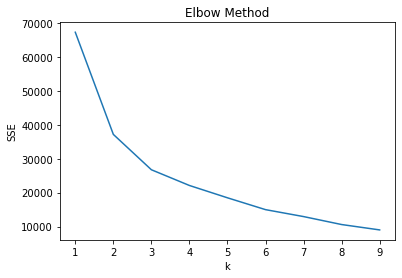

In [27]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
from matplotlib import pyplot as plt

sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [28]:
# Initialize the K-Means model.

model = KMeans(n_clusters=6, random_state=32)
# Fit the model

model.fit(X_pca)
# Predict clusters

predicted = model.predict(X_pca)
predicted

array([0, 0, 0, ..., 3, 3, 3])

In [29]:
pca.explained_variance_ratio_

array([0.46258011, 0.14977347, 0.069177  , 0.05496566, 0.03857538])

In [30]:
# Create a new DataFrame including predicted clusters and cancer features.
# Concatentate the eco_cancer_data_ml and pcs_df DataFrames on the same columns.

all_cancer_clustered_df = pd.concat([eco_cancer_data_ml, pcs_df], axis=1, join="outer")

#  Add a new column, "Country" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 

all_cancer_clustered_df["Country"] = country_name_df["Country"]
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.

all_cancer_clustered_df["Class"] = predicted

# Print the shape of the clustered_df
print(all_cancer_clustered_df.shape)
all_cancer_clustered_df.head(10)

(2552, 35)


Liver cancer  Kidney cancer  Tracheal, bronchus, and lung cancer  \
1            301             42                                  734   
2            295             47                                  765   
3            290             53                                  806   
4            272             57                                  817   
5            246             60                                  804   
6            224             61                                  780   
7            211             63                                  768   
8            208             66                                  796   
9            207             67                                  809   
10           214             67                                  826   

    Malignant skin melanoma  Leukemia  Breast cancer  Prostate cancer  \
1                        21       121            163              195   
2                        21       124            175              206   
3                        21       129            191              219   
4                        21       132            198              227   
5                        20       131            208              230   
6                        20       126            210              229   
7                        20       122            209              233   
8                        20       125            219              245   
9                        21       126            220              256   
10                       22       127            225              269   

    Thyroid cancer  Bladder cancer  Uterine cancer  ...  \
1               14              26              28  ...   
2               14              28              30  ...   
3               15              30              32  ...   
4               15              31              33  ...   
5               15              31              35  ...   
6               14              31              34  ...   
7               13              31              34  ...   
8               13              32              35  ...   
9               14              33              36  ...   
10              14              34              36  ...   

    Total natural resources rents (% of GDP)  \
1                                   0.755950   
2                                   0.760798   
3                                   0.733194   
4                                   0.770849   
5                                   1.018382   
6                                   1.321831   
7                                   1.761086   
8                                   1.109999   
9                                   0.605980   
10                                  1.574506   

    Urban population (% of total population)                World Regions  \
1                                     42.435  Europe and Northern America   
2                                     43.501  Europe and Northern America   
3                                     44.573  Europe and Northern America   
4                                     45.651  Europe and Northern America   
5                                     46.731  Europe and Northern America   
6                                     47.815  Europe and Northern America   
7                                     48.902  Europe and Northern America   
8                                     49.991  Europe and Northern America   
9                                     51.076  Europe and Northern America   
10                                    52.163  Europe and Northern America   

        PC 1      PC 2      PC 3      PC 4      PC 5  Country  Class  
1  -1.100619 -0.661651 -1.394170 -0.257220  0.881057  Albania      0  
2  -1.084860 -0.753255 -1.336610 -0.277946  0.905996  Albania      0  
3  -1.073478 -0.825797 -1.336032 -0.252947  0.880741  Albania      0  
4  -1.074026 -0.846409 -1.385060 -0.186035  0.811663  Albania      0  
5  -1.071380 -0.882267 -1

Individual kmeans by cancer type

In [31]:
cancer_list=['Liver cancer', 'Kidney cancer',
       'Tracheal, bronchus, and lung cancer', 'Malignant skin melanoma',
       'Leukemia', 'Breast cancer', 'Prostate cancer', 'Thyroid cancer',
       'Bladder cancer', 'Uterine cancer', 'Ovarian cancer', 'Cervical cancer',
       'Non-Hodgkin lymphoma', 'Pancreatic cancer', 'Colon and rectum cancer']

for x in cancer_list:
    X[x]=X[x]/(X["Population"]/1000000)

temp_list=[]
df_list ={}
keys = []
for name in cancer_list:
    temp_list = cancer_list
    temp_list = [x for x in cancer_list if x != name]
    k= (f'X_{name}')
    keys.append(k)
    df_list[k]=X.drop(columns = temp_list, axis=1)
        
for dict in df_list:
    df_list[dict].drop(columns="Population", axis=1)        
        
df_list['X_Liver cancer']

Liver cancer  Adjusted savings: carbon dioxide damage (% of GNI)  \
1        98.360452                                           1.534561    
2        96.689293                                           1.688402    
3        95.406788                                           1.556741    
4        89.859756                                           1.248493    
5        81.687220                                           1.200393    
...            ...                                                ...    
2826     68.522843                                           2.310859    
2827     68.622842                                           2.381654    
2828     68.850800                                           2.101249    
2829     68.977148                                           2.102515    
2830     69.119260                                           2.003068    

      Adjusted savings: natural resources depletion (% of GNI)  \
1                                              0.214370          
2                                              0.229341          
3                                              0.230807          
4                                              0.248708          
5                                              0.353888          
...                                                 ...          
2826                                           1.573499          
2827                                           0.844003          
2828                                           0.823740          
2829                                           1.300127          
2830                                           2.085152          

      Adjusted savings: net forest depletion (% of GNI)  \
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
5                                                   0.0   
...                                                 ...   
2826                                                0.0   
2827                                                0.0   
2828                                                0.0   
2829                                                0.0   
2830                                                0.0   

      Adjusted savings: particulate emission damage (% of GNI)  \
1                                              0.381428          
2                                              0.366751          
3                                              0.354888          
4                                              0.333259          
5                                              0.308829          
...                                                 ...          
2826                                           1.426705          
2827                                           1.492774          
2828                                           1.496494          
2829                                           1.422511          
2830                                           1.422511          

      GDP (current US$)  Renewable energy consumption  \
1          3.922099e+09                     39.125301   
2          4.348070e+09                     35.895802   
3          5.611492e+09                     33.751701   
4          7.184681e+09                     35.934700   
5          8.052076e+09                     36.868301   
...                 ...                           ...   
2826       1.949552e+10                     80.775002   
2827       1.996312e+10                     81.427200   
2828       2.054868e+10                     82.792603   
2829       1.901533e+10                     83.492996   
2830       1.952362e+10                     81.363602   

      Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes  \
1                                         

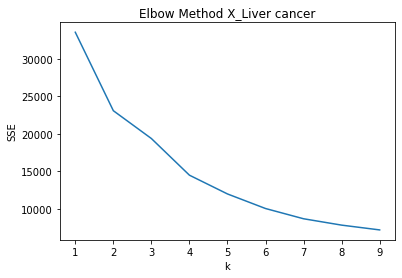

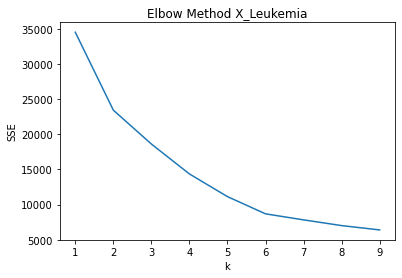

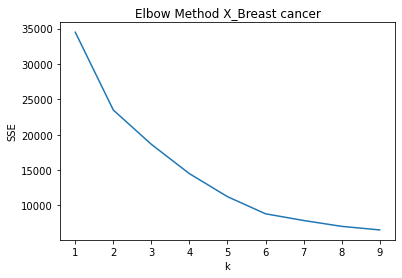

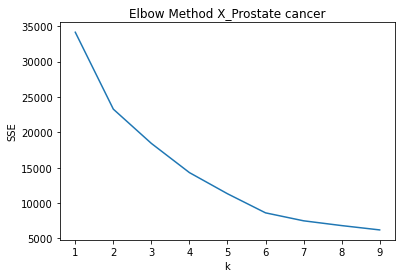

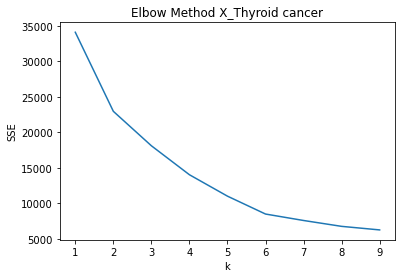

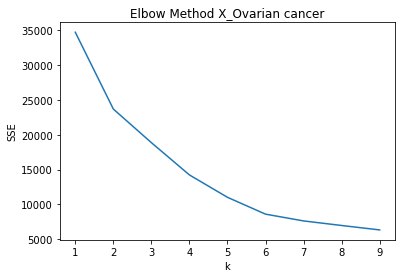

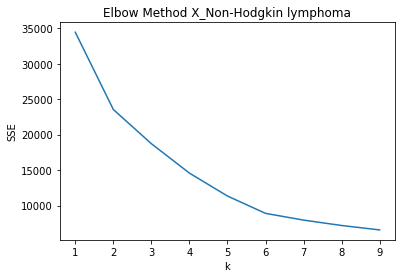

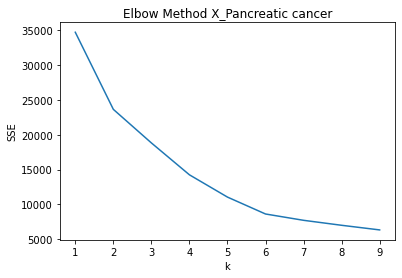

In [32]:
# Create Elbow Curves by looping through dataframes in df_list dictionary

for dict in keys:
    X_scaled = StandardScaler().fit_transform(df_list[dict])
    # Using PCA to reduce dimension to three principal components.
    pca = PCA(n_components=5, random_state=32)
    X_pca = pca.fit_transform(X_scaled)
    pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3","PC 4","PC 5"], index = df_list[dict].index)
    # Create an elbow curve to find the best value for K
    sse = {}
    K = range(1,10)
    for k in K:
        kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
        sse[k]= kmeanmodel.inertia_

    # Plot
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title(f'Elbow Method {dict}')
    plt.show()

In [33]:
#  Run kmeans run across each cancer data set 
pca_dfs = ['X_Liver', 'X_Kidney', 'X_Tracheal', 'X_melanoma', 'X_Leukemia',
           'X_Breast', 'X_Prostate', 'X_Thyroid', 'X_Bladder', 'X_Uterine', 'X_Ovarian',
           'X_Cervical', 'X_Non-Hodgkin', 'X_Pancreatic', 'X_Colon']

# Set up Scaled Dict
one_cancer_predicted_dict = {}
count = -1

for dict in keys:
    X_scaled = StandardScaler().fit_transform(df_list[dict])
    pca = PCA(n_components=6, random_state=32)
    X_pca = pca.fit_transform(X_scaled)
    pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3","PC 4","PC 5","PC 6"], index = df_list[dict].index)
    # initiate kmeans model
    model = KMeans(n_clusters=6, random_state=32)
    # Fit the model
    model.fit(X_pca)
    # Predict clusters
    predicted = model.predict(X_pca)
    
# Create a new DataFrame including predicted clusters and cancer features.
# Concatentate the eco_cancer_data_ml and pcs_df DataFrames on the same columns.
    count += 1
    one_cancer_predicted_dict[pca_dfs[count]] = pd.concat([df_list[dict], pcs_df], axis=1, join="outer")

#  Add a new column, "Country", "year" and to each cancer datafarame

    one_cancer_predicted_dict[pca_dfs[count]]["Country"] = country_name_df["Country"]
    one_cancer_predicted_dict[pca_dfs[count]]["Year"] = country_name_df["Year"]
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.

    one_cancer_predicted_dict[pca_dfs[count]]["Class"] = predicted

In [34]:
one_cancer_predicted_dict['X_Non-Hodgkin'].columns

Index(['Non-Hodgkin lymphoma',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Adjusted savings: particulate emission damage (% of GNI)',
       'GDP (current US$)', 'Renewable energy consumption',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Life expectancy at birth, total (years)', 'Population',
       'Rural population (% of total population)',
       'Total natural resources rents (% of GDP)',
       'Urban population (% of total population)',
       'World Regions_Central and Southern Asia',
       'World Regions_Eastern and South-Eastern Asia',
       'World Regions_Europe and Northern America',
       'World Regions_Latin America and Caribbean',
       'World Regions_Northern Africa and Western Asia',
       'World Regions_Oceania', 'World Regions_Sub-Saharan Africa', 'PC 1',

For Class Liver cancer Training Score: 0.4351440842360952
For Class Liver cancer Testing Score: 0.3910300598314975


For Class Kidney cancer Training Score: 0.7579987405528277
For Class Kidney cancer Testing Score: 0.7492546294748557


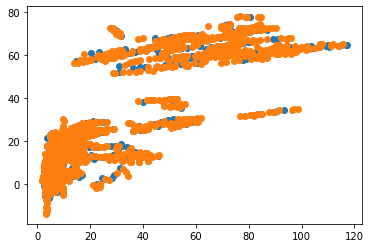

For Class Tracheal, bronchus, and lung cancer Training Score: 0.809521659060988
For Class Tracheal, bronchus, and lung cancer Testing Score: 0.8191730966277504


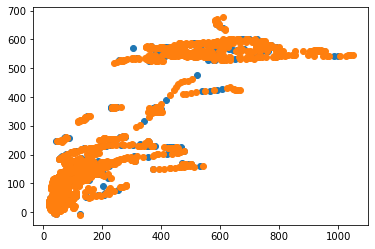

For Class Malignant skin melanoma Training Score: 0.7273879054755412
For Class Malignant skin melanoma Testing Score: 0.6862553973998338


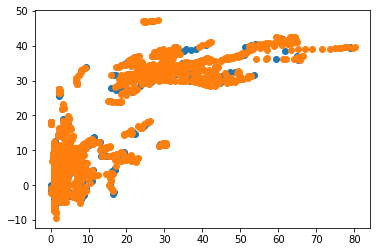

For Class Leukemia Training Score: 0.726542198462539
For Class Leukemia Testing Score: 0.7227961509885237


For Class Breast cancer Training Score: 0.6770849465466182
For Class Breast cancer Testing Score: 0.6866424089951896


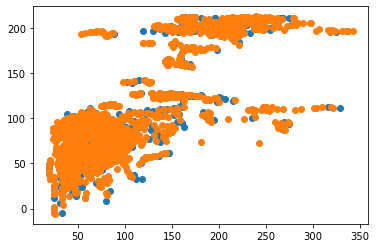

For Class Prostate cancer Training Score: 0.6047841047341941
For Class Prostate cancer Testing Score: 0.6256077039279675


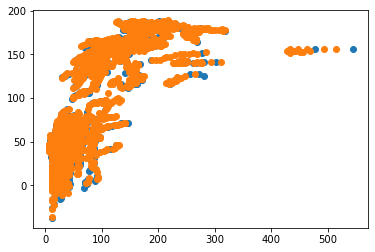

For Class Thyroid cancer Training Score: 0.6179949026780039
For Class Thyroid cancer Testing Score: 0.6529513930497477


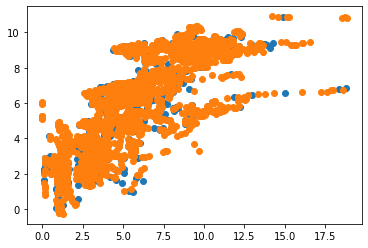

For Class Bladder cancer Training Score: 0.7544170563680164
For Class Bladder cancer Testing Score: 0.750448906527322


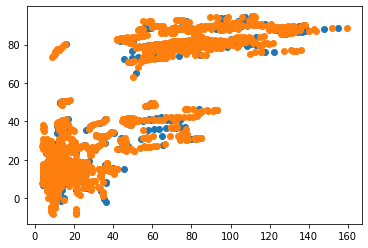

For Class Uterine cancer Training Score: 0.6061887058488085
For Class Uterine cancer Testing Score: 0.6457414063059659


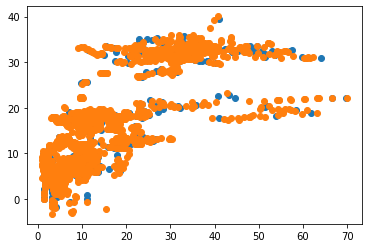

For Class Ovarian cancer Training Score: 0.7995872113242294
For Class Ovarian cancer Testing Score: 0.799943854237102


For Class Cervical cancer Training Score: 0.6343385854008255
For Class Cervical cancer Testing Score: 0.5836379033010841


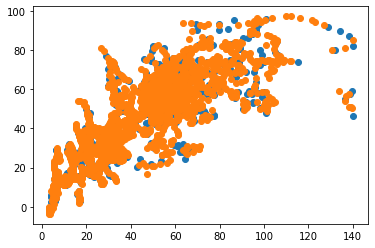

For Class Non-Hodgkin lymphoma Training Score: 0.6578257567469424
For Class Non-Hodgkin lymphoma Testing Score: 0.6695656475868059


For Class Pancreatic cancer Training Score: 0.7945180359140067
For Class Pancreatic cancer Testing Score: 0.7939218162479937


For Class Colon and rectum cancer Training Score: 0.7593785526850381
For Class Colon and rectum cancer Testing Score: 0.780788788863055


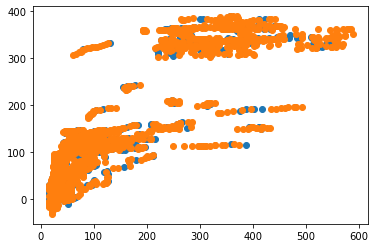

In [35]:
#  Create for loop from one_cancer_predicted_dict Regression for all classes
count=-1
predictions = {}
for name in one_cancer_predicted_dict:
        count += 1
        run_df = one_cancer_predicted_dict[name]
        y = run_df[cancer_list[count]]
        X = run_df.drop(columns=[cancer_list[count],"PC 1", "PC 2", "PC 3", "PC 4","PC 5","PC 6", "Country", "Year","Population"], axis=1)

        # Splitting into Train and Test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

        # Fit model
        model = LinearRegression()

        # Learning stage
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        
        # Calc Tarining Scores 
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        print(f"For Class {cancer_list[count]} Training Score: {training_score}")
        print(f"For Class {cancer_list[count]} Testing Score: {testing_score}")
        plt.scatter(y_test,y_pred)
        plt.scatter(y_train,y_train_pred)
        plt.show()

For Class 1 Liver cancer Training Score: 0.6645024706575899
For Class 1 Liver cancer Testing Score: 0.6505697038063426


For Class 1 Kidney cancer Training Score: 0.23362397692500336
For Class 1 Kidney cancer Testing Score: 0.14599394336351634


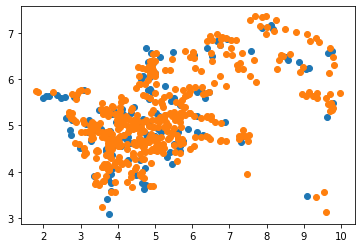

For Class 1 Tracheal, bronchus, and lung cancer Training Score: 0.4425980199075963
For Class 1 Tracheal, bronchus, and lung cancer Testing Score: 0.3490048762000416


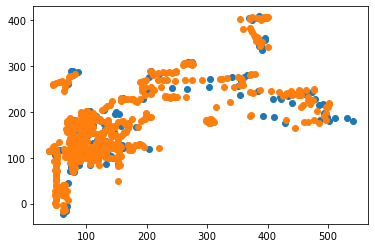

For Class 1 Malignant skin melanoma Training Score: 0.40731609104082833
For Class 1 Malignant skin melanoma Testing Score: 0.14292798057488298


For Class 1 Leukemia Training Score: 0.16844312746752987
For Class 1 Leukemia Testing Score: 0.21579520144548892


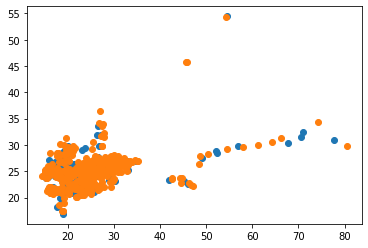

For Class 1 Breast cancer Training Score: 0.6435087470904584
For Class 1 Breast cancer Testing Score: 0.6190667897671749


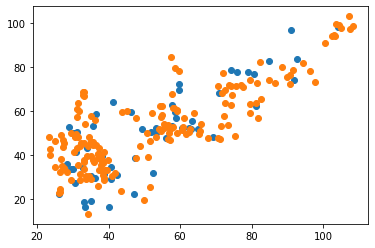

For Class 1 Prostate cancer Training Score: 0.4651573941602777
For Class 1 Prostate cancer Testing Score: 0.5401150939537023


For Class 1 Thyroid cancer Training Score: 0.3505869377472397
For Class 1 Thyroid cancer Testing Score: 0.4729020792128025


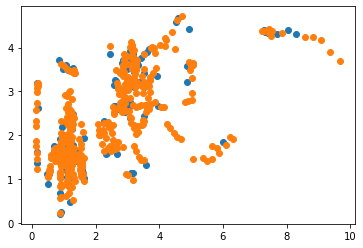

For Class 1 Bladder cancer Training Score: 0.19995291169267548
For Class 1 Bladder cancer Testing Score: 0.21712138468821052


For Class 1 Uterine cancer Training Score: 0.6346183285005065
For Class 1 Uterine cancer Testing Score: 0.6403026768799509


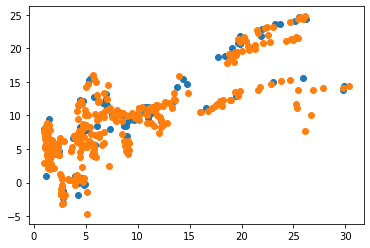

For Class 1 Ovarian cancer Training Score: 0.32150117615371443
For Class 1 Ovarian cancer Testing Score: 0.3179398775700557


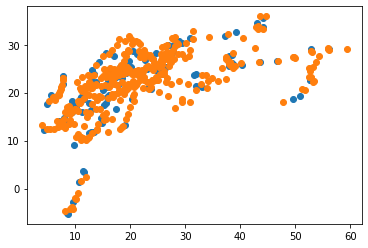

For Class 1 Cervical cancer Training Score: 0.28182956585943253
For Class 1 Cervical cancer Testing Score: 0.39280149671827425


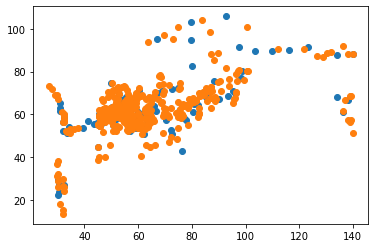

For Class 1 Non-Hodgkin lymphoma Training Score: 0.2777677634360457
For Class 1 Non-Hodgkin lymphoma Testing Score: 0.22214323563839533


For Class 1 Pancreatic cancer Training Score: 0.6344280276216862
For Class 1 Pancreatic cancer Testing Score: 0.5610467981210492


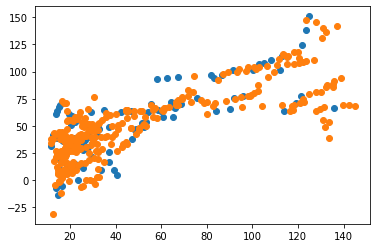

For Class 1 Colon and rectum cancer Training Score: 0.4142794360183196
For Class 1 Colon and rectum cancer Testing Score: 0.44467952419358914


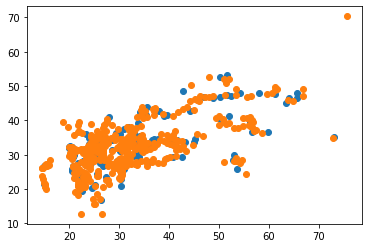

For Class 2 Liver cancer Training Score: 0.37649426087145965
For Class 2 Liver cancer Testing Score: 0.4517639650578622


For Class 2 Kidney cancer Training Score: 0.42169611329122914
For Class 2 Kidney cancer Testing Score: 0.22527981583157985


For Class 2 Tracheal, bronchus, and lung cancer Training Score: 0.9981608985657044
For Class 2 Tracheal, bronchus, and lung cancer Testing Score: 0.9914992098968948


For Class 2 Malignant skin melanoma Training Score: 0.5207837046240138
For Class 2 Malignant skin melanoma Testing Score: 0.5432479778004802


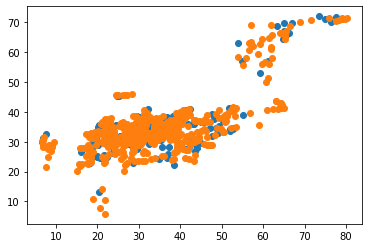

For Class 2 Leukemia Training Score: 0.36036564550055417
For Class 2 Leukemia Testing Score: 0.4194927387185986


For Class 2 Breast cancer Training Score: 0.4064575697502759
For Class 2 Breast cancer Testing Score: 0.45865166761410037


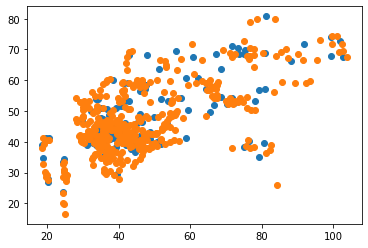

For Class 2 Prostate cancer Training Score: 0.5977204206610502
For Class 2 Prostate cancer Testing Score: 0.567796272557155


For Class 2 Thyroid cancer Training Score: 0.5268294976079605
For Class 2 Thyroid cancer Testing Score: 0.5893114979023761


For Class 2 Bladder cancer Training Score: 0.31990886301223365
For Class 2 Bladder cancer Testing Score: 0.37425893720221026


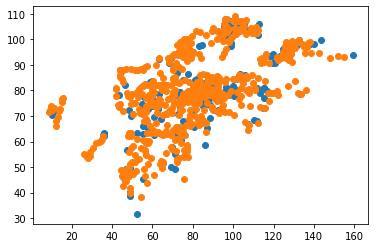

For Class 2 Uterine cancer Training Score: 0.5825419701203509
For Class 2 Uterine cancer Testing Score: 0.5727411986530593


For Class 2 Ovarian cancer Training Score: 0.405296919439857
For Class 2 Ovarian cancer Testing Score: 0.44143452269832073


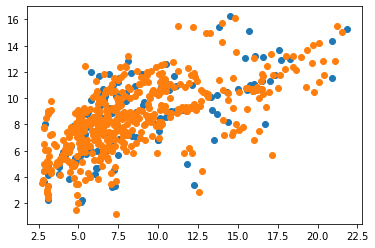

For Class 2 Cervical cancer Training Score: 0.5830571803983716
For Class 2 Cervical cancer Testing Score: 0.5840844211427787


For Class 2 Non-Hodgkin lymphoma Training Score: 0.6634889188636095
For Class 2 Non-Hodgkin lymphoma Testing Score: 0.6591832121422382


For Class 2 Pancreatic cancer Training Score: 0.9990471368122246
For Class 2 Pancreatic cancer Testing Score: 0.9903290079717487


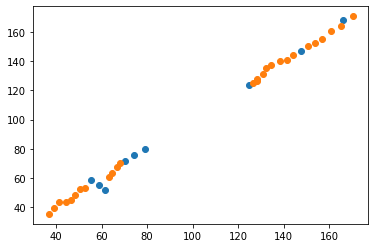

For Class 2 Colon and rectum cancer Training Score: 0.7950387294615553
For Class 2 Colon and rectum cancer Testing Score: 0.7280250833707363


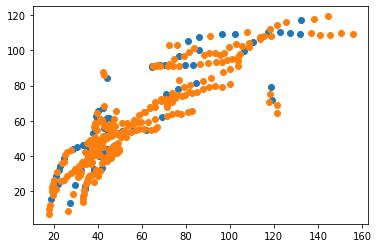

For Class 3 Liver cancer Training Score: 0.9945673969399986
For Class 3 Liver cancer Testing Score: 0.9546233950244645


For Class 3 Kidney cancer Training Score: 0.3368101236257738
For Class 3 Kidney cancer Testing Score: 0.22945308280282917


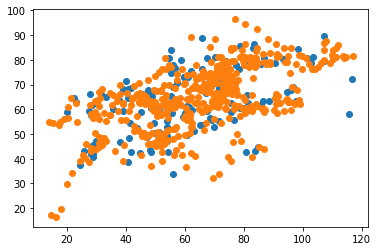

For Class 3 Tracheal, bronchus, and lung cancer Training Score: 0.567230095802984
For Class 3 Tracheal, bronchus, and lung cancer Testing Score: 0.6108355445145643


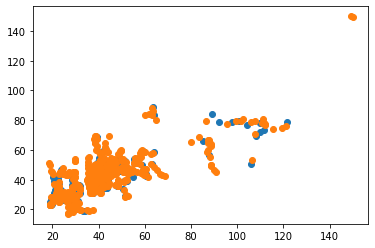

For Class 3 Malignant skin melanoma Training Score: 0.5701123394741263
For Class 3 Malignant skin melanoma Testing Score: 0.38086097975566746


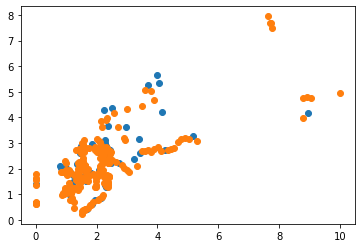

For Class 3 Leukemia Training Score: 0.645677646359466
For Class 3 Leukemia Testing Score: 0.7434025892685368


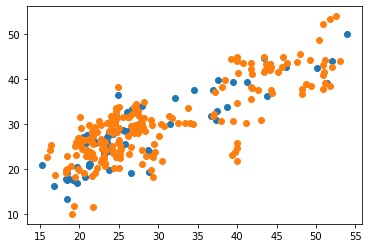

For Class 3 Breast cancer Training Score: 0.1622653657886488
For Class 3 Breast cancer Testing Score: 0.18329090955467264


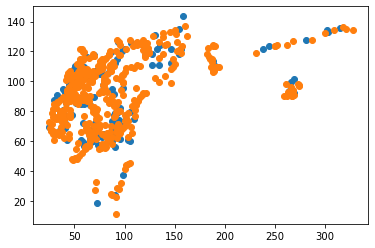

For Class 3 Prostate cancer Training Score: 0.424179955755718
For Class 3 Prostate cancer Testing Score: 0.41440853294666113


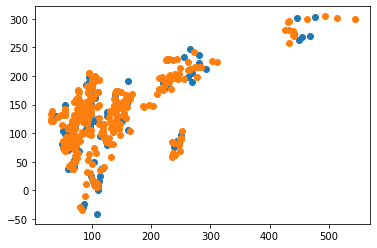

For Class 3 Thyroid cancer Training Score: 0.2563566787127277
For Class 3 Thyroid cancer Testing Score: 0.26642748667106886


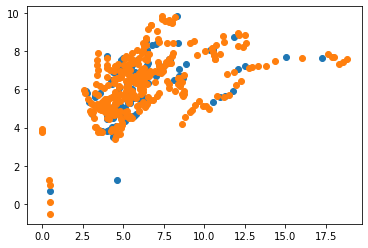

For Class 3 Bladder cancer Training Score: 0.5918454989213214
For Class 3 Bladder cancer Testing Score: 0.6516362230629444


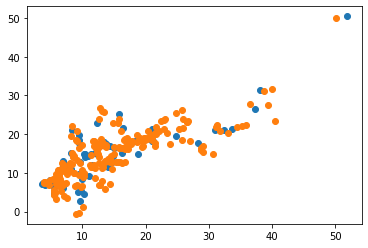

For Class 3 Uterine cancer Training Score: 0.31985528493133175
For Class 3 Uterine cancer Testing Score: 0.37783802137835343


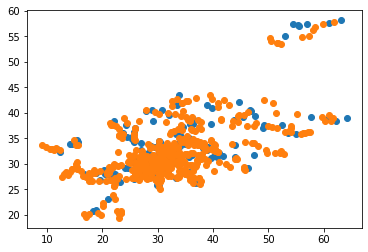

For Class 3 Ovarian cancer Training Score: 0.34510889101159725
For Class 3 Ovarian cancer Testing Score: 0.19987689114009166


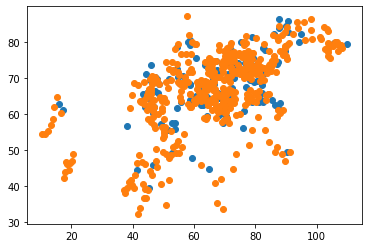

For Class 3 Cervical cancer Training Score: 0.9472391777123637
For Class 3 Cervical cancer Testing Score: 0.952346328090585


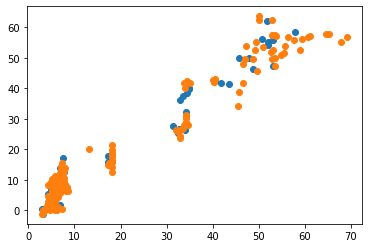

For Class 3 Non-Hodgkin lymphoma Training Score: 0.35900295806979343
For Class 3 Non-Hodgkin lymphoma Testing Score: 0.3319875484191458


For Class 3 Pancreatic cancer Training Score: 0.2565104895086324
For Class 3 Pancreatic cancer Testing Score: 0.21174439170113946


For Class 3 Colon and rectum cancer Training Score: 0.11931512792948828
For Class 3 Colon and rectum cancer Testing Score: 0.08569158733749371


For Class 4 Liver cancer Training Score: 0.17805755266440848
For Class 4 Liver cancer Testing Score: 0.10699844049358398


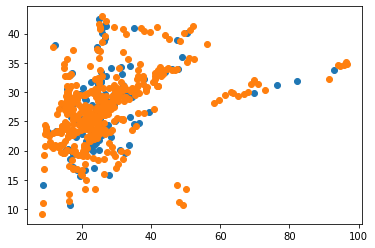

For Class 4 Kidney cancer Training Score: 0.9996343985003115
For Class 4 Kidney cancer Testing Score: 0.9974982264234227


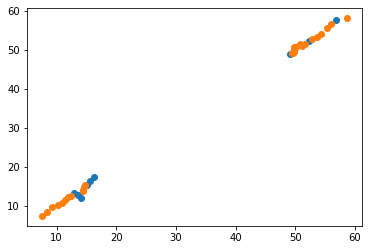

For Class 4 Tracheal, bronchus, and lung cancer Training Score: 0.7271972310679201
For Class 4 Tracheal, bronchus, and lung cancer Testing Score: 0.6669461357665402


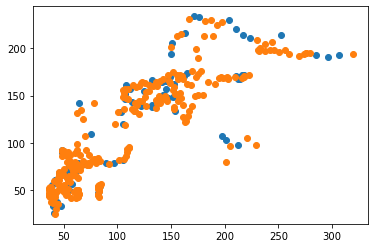

For Class 4 Malignant skin melanoma Training Score: 0.777746981286597
For Class 4 Malignant skin melanoma Testing Score: 0.47453360046186677


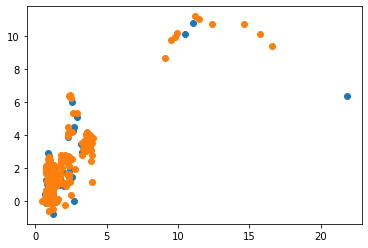

For Class 4 Leukemia Training Score: 0.6261064747638583
For Class 4 Leukemia Testing Score: 0.6111556095709714


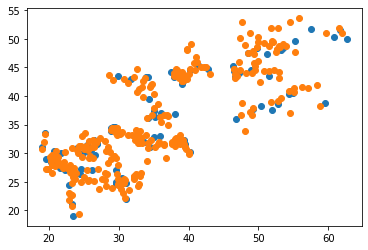

For Class 4 Breast cancer Training Score: 0.9998448817827805
For Class 4 Breast cancer Testing Score: 0.9983406129885711


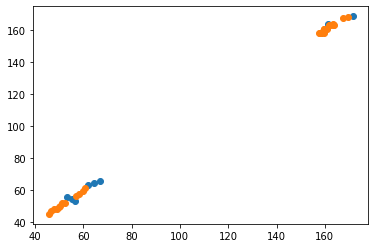

For Class 4 Prostate cancer Training Score: 0.9994004721562488
For Class 4 Prostate cancer Testing Score: 0.998009774170659


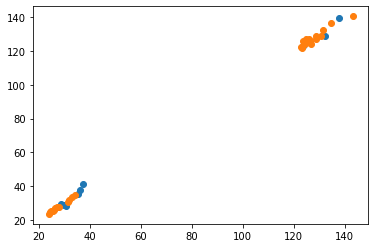

For Class 4 Thyroid cancer Training Score: 0.4033377510968783
For Class 4 Thyroid cancer Testing Score: 0.3876351519461011


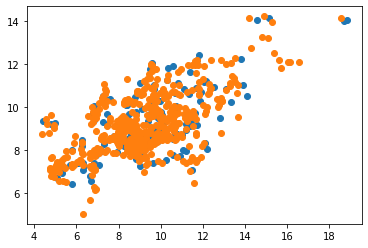

For Class 4 Bladder cancer Training Score: 0.43466473880615253
For Class 4 Bladder cancer Testing Score: -0.045202102867936134


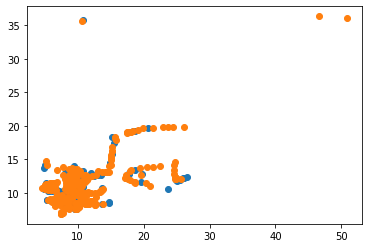

For Class 4 Uterine cancer Training Score: 0.9959636014763434
For Class 4 Uterine cancer Testing Score: 0.9780135253858452


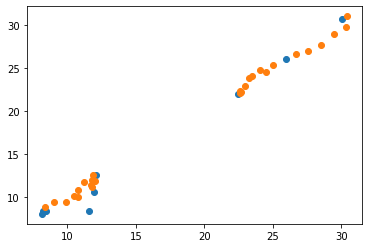

For Class 4 Ovarian cancer Training Score: 0.9995733045234573
For Class 4 Ovarian cancer Testing Score: 0.9992628756749451


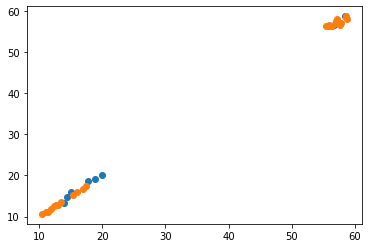

For Class 4 Cervical cancer Training Score: 0.8757585821735695
For Class 4 Cervical cancer Testing Score: 0.8860104196543797


For Class 4 Non-Hodgkin lymphoma Training Score: 0.9987566784948727
For Class 4 Non-Hodgkin lymphoma Testing Score: 0.997825684130305


For Class 4 Pancreatic cancer Training Score: 0.36733432283287626
For Class 4 Pancreatic cancer Testing Score: 0.3716716913135002


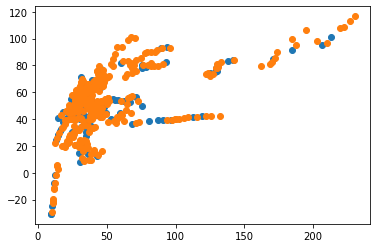

For Class 4 Colon and rectum cancer Training Score: 0.9980637946933455
For Class 4 Colon and rectum cancer Testing Score: 0.9808943395905597


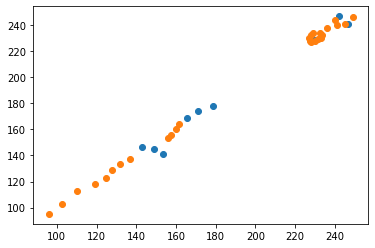

For Class 5 Liver cancer Training Score: 0.9835454870361797
For Class 5 Liver cancer Testing Score: 0.555695769525257


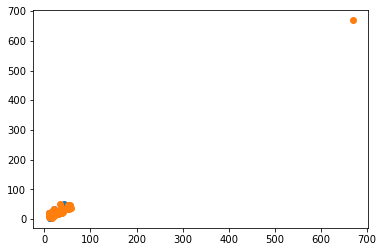

For Class 5 Kidney cancer Training Score: 0.48171194472631595
For Class 5 Kidney cancer Testing Score: 0.48761920951880633


For Class 5 Tracheal, bronchus, and lung cancer Training Score: 0.7424388522739684
For Class 5 Tracheal, bronchus, and lung cancer Testing Score: 0.7252632102702337


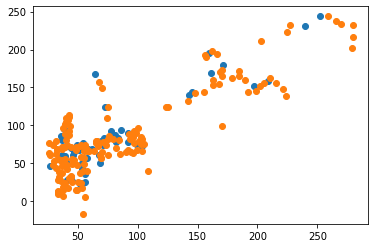

For Class 5 Malignant skin melanoma Training Score: 0.9998371849139553
For Class 5 Malignant skin melanoma Testing Score: 0.9994723712640562


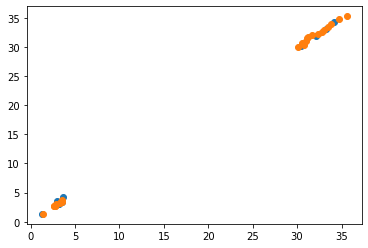

For Class 5 Leukemia Training Score: 0.9996319549913484
For Class 5 Leukemia Testing Score: 0.9985625760317394


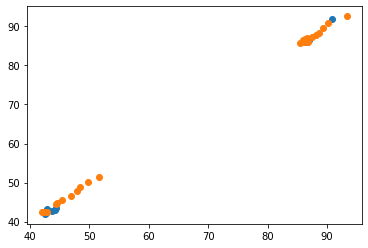

For Class 5 Breast cancer Training Score: 0.5028726431057886
For Class 5 Breast cancer Testing Score: 0.36422038618141916


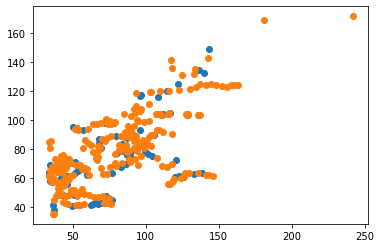

For Class 5 Prostate cancer Training Score: 0.7937140260015022
For Class 5 Prostate cancer Testing Score: 0.8313548344365093


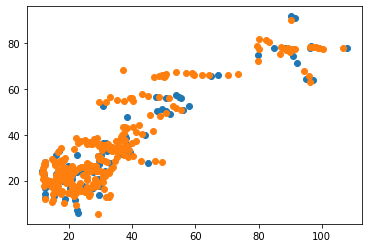

For Class 5 Thyroid cancer Training Score: 0.9979547544102251
For Class 5 Thyroid cancer Testing Score: 0.9565930932299098


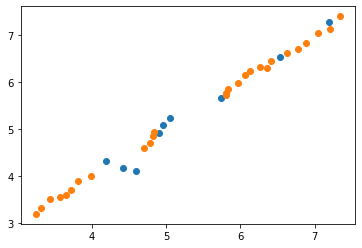

For Class 5 Bladder cancer Training Score: 0.9997276495992995
For Class 5 Bladder cancer Testing Score: 0.9963898080895295


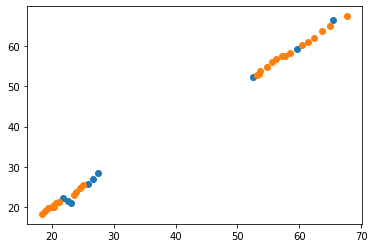

For Class 5 Uterine cancer Training Score: 0.43367983385018694
For Class 5 Uterine cancer Testing Score: 0.49855577461183953


For Class 5 Ovarian cancer Training Score: 0.4887702010403443
For Class 5 Ovarian cancer Testing Score: 0.3977543176498457


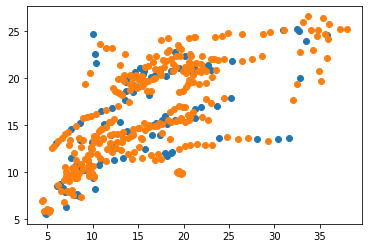

For Class 5 Cervical cancer Training Score: 0.9973030987894232
For Class 5 Cervical cancer Testing Score: 0.982206358160874


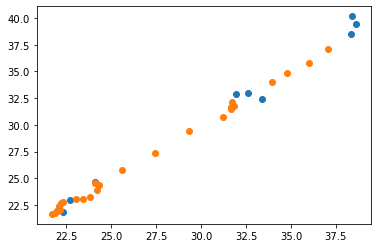

For Class 5 Non-Hodgkin lymphoma Training Score: 0.44330534068813165
For Class 5 Non-Hodgkin lymphoma Testing Score: 0.485091443160669


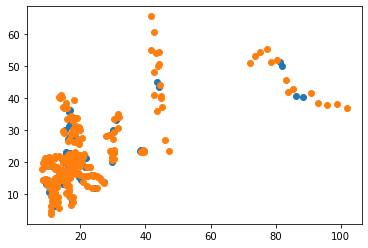

For Class 5 Pancreatic cancer Training Score: 0.6861119724179965
For Class 5 Pancreatic cancer Testing Score: 0.7400174918906104


For Class 5 Colon and rectum cancer Training Score: 0.7292111736359539
For Class 5 Colon and rectum cancer Testing Score: 0.6869531885350413


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [36]:
#  Create for loop from one_cancer_predicted_dict Regression by CLass
for x in range(6):
    count=-1

    for name in one_cancer_predicted_dict:
            count += 1
            run_df = one_cancer_predicted_dict[name][one_cancer_predicted_dict[name]["Class"]==(x+1)]
            y = run_df[cancer_list[count]]
            X = run_df.drop(columns=[cancer_list[count],"PC 1", "PC 2", "PC 3", "PC 4","PC 5","PC 6", "Country", "Year","Population","Class"], axis=1)

            # Splitting into Train and Test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

            # Fit model
            model = LinearRegression()

            # Learning stage
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)
            y_train_pred = model.predict(X_train)
            # Calc Tarining Scores 
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            print(f"For Class {x+1} {cancer_list[count]} Training Score: {training_score}")
            print(f"For Class {x+1} {cancer_list[count]} Testing Score: {testing_score}")
            plt.scatter(y_test,y_pred)
            plt.scatter(y_train,y_train_pred)
            plt.show()

In [ ]:
one_cancer_predicted_dict['X_Liver'].head()